In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
import numpy as np
import cv2
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt


## DataSet

In [2]:
dataset_path = '/content/drive/MyDrive/animal'
width = height = 224

idg = ImageDataGenerator(

    rescale = 1./255,
    horizontal_flip = True,
    zoom_range = 0.1,
    brightness_range = (0.9,1.1),
    rotation_range = 15,
    validation_split = 0.2 #validation data
)

train_data = idg.flow_from_directory(
    dataset_path,
    target_size = (width,height),
    class_mode = "categorical",
    subset = "training"
)

val_data = idg.flow_from_directory(  #eamal taghirat bar roye tasavir
    dataset_path,
    target_size = (width,height),
    class_mode = "categorical",
    subset = "validation"
)

Found 1045 images belonging to 5 classes.
Found 258 images belonging to 5 classes.


## Model

In [5]:
model = tf.keras.models.Sequential([
  Conv2D(16,(3,3),activation='relu',strides=(2, 2),input_shape=(width,height,3)),
  Conv2D(32,(3,3),activation='relu',strides=(2, 2)),
  MaxPool2D(),
  Conv2D(64,(5,5),activation='relu',strides=(2, 2)),
  Conv2D(128,(3,3),activation='relu',strides=(2, 2)),
  MaxPool2D(),

  Flatten(),
  Dense(512,activation='relu'),
  Dense(5,activation='softmax')
])

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [7]:
model.fit(train_data,validation_data=val_data,epochs=20)

Epoch 1/20
33/33 [==============================] - 55s 2s/step - loss: 1.5813 - accuracy: 0.2555 - val_loss: 1.5755 - val_accuracy: 0.3320
Epoch 2/20
33/33 [==============================] - 50s 2s/step - loss: 1.4797 - accuracy: 0.3722 - val_loss: 1.3786 - val_accuracy: 0.3629
Epoch 3/20
33/33 [==============================] - 49s 1s/step - loss: 1.3343 - accuracy: 0.4010 - val_loss: 1.2952 - val_accuracy: 0.4517
Epoch 4/20
33/33 [==============================] - 46s 1s/step - loss: 1.2515 - accuracy: 0.4756 - val_loss: 1.2423 - val_accuracy: 0.4903
Epoch 5/20
33/33 [==============================] - 45s 1s/step - loss: 1.1946 - accuracy: 0.4986 - val_loss: 1.1934 - val_accuracy: 0.4826
Epoch 6/20
33/33 [==============================] - 49s 1s/step - loss: 1.1291 - accuracy: 0.5321 - val_loss: 1.2288 - val_accuracy: 0.4556
Epoch 7/20
33/33 [==============================] - 47s 1s/step - loss: 1.0896 - accuracy: 0.5627 - val_loss: 1.1424 - val_accuracy: 0.5483
Epoch 8/20
33/33 [==

In [ ]:
model.save('animals.h5')

In [5]:
from keras.models import load_model
model = load_model('/content/animals.h5')

## Confusion Matrix

9/9 [==============================] - 114s 13s/step


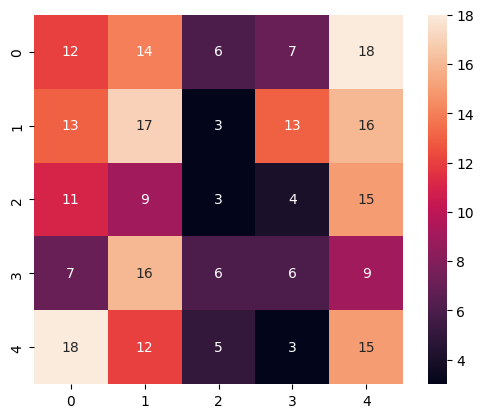

In [6]:
Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)
conf_mat = confusion_matrix(val_data.classes, y_pred)


sn.heatmap(conf_mat, annot=True)
plt.imshow(conf_mat)

## Inference

In [13]:
image = cv2.imread('/content/panda.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img = cv2.resize(image ,(width,height))
img = img / 255
img = img.reshape(1,width,height,3)

result = np.argmax(model.predict(img))
result

1/1 [==============================] - 0s 24ms/step


4

In [14]:
if result == 0:
  print('😺')

elif result == 1:
  print('🐶')

elif result == 2:
  print('🐘')

elif result == 3:
  print('🦒')
elif result == 4:
  print('🐼')

🐼


In [15]:
image = cv2.imread('/content/giraffe.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img = cv2.resize(image ,(width,height))
img = img / 255
img = img.reshape(1,width,height,3)

result = np.argmax(model.predict(img))
result

1/1 [==============================] - 0s 41ms/step


3

In [16]:
if result == 0:
  print('😺')

elif result == 1:
  print('🐶')

elif result == 2:
  print('🐘')

elif result == 3:
  print('🦒')
elif result == 4:
  print('🐼')

🦒


In [17]:
image = cv2.imread('/content/elephant.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img = cv2.resize(image ,(width,height))
img = img / 255
img = img.reshape(1,width,height,3)
result = np.argmax(model.predict(img))
result

1/1 [==============================] - 0s 26ms/step


2

In [18]:
if result == 0:
  print('😺')

elif result == 1:
  print('🐶')

elif result == 2:
  print('🐘')

elif result == 3:
  print('🦒')
elif result == 4:
  print('🐼')

🐘
